In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [3]:
# import the data
df = pd.read_csv('data/spam.csv', encoding='latin1')

In [4]:
# Drop unncessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
# Rename the columns to something better
df.columns = ['labels', 'data']

In [7]:
# Create column and remap ham/spam to 0/1
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels']

In [11]:
# Create count matrix for data
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [12]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [14]:
# Test model using Naive Bayes
model = MultinomialNB()
model.fit(X_train, Y_train)
print('Train score: ', model.score(X_train, Y_train))
print('Train score: ', model.score(X_test, Y_test))

Train score:  0.994374497723011
Train score:  0.9831430125067971


In [ ]:
# Create tfidf matrix for data
tfidf = TfidfVectorizer(decode_error='ignore')
X_tf = tfidf.fit_transform(df['data'])

In [16]:
# Split the data
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(X_tf, Y, test_size=0.33)

In [17]:
# Test model using Naive Bayes
model = MultinomialNB()
model.fit(X_train_tf, Y_train_tf)
print('Train score: ', model.score(X_train_tf, Y_train_tf))
print('Train score: ', model.score(X_test_tf, Y_test_tf))

Train score:  0.9683900348245379
Train score:  0.9526916802610114


In [38]:
# Visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

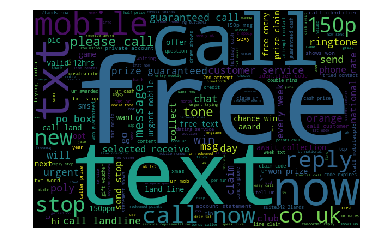

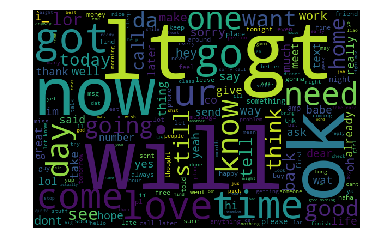

In [39]:
visualize('spam')
visualize('ham')

In [40]:
# See what values we're predicting
df['predictions']=model.predict(X)

In [44]:
# Spam that was not detected correctly
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg, '\n')

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv 

Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged 

Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!" 

You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again 

Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery 

BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu 

Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES 

U 447801259231 have a

In [45]:
# Ham that was mistaken as spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg, '\n')

Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May 

Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai.......... 

wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .." 

staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323 

Raviyog Peripherals bhayandar east 

wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .." 

Gettin rdy to ship comp 

Received, understood n acted upon! 

Garbage bags, eggs, jam, bread, hannaford wheat chex 

